# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 165MB/s]


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder , StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [4]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [5]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [7]:
df.shape

(147972, 21)

In [8]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [9]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [10]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [11]:
# for numerical variables
df.select_dtypes(include =['int64']).corr()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
Busbreakdown_ID,1.000000,-0.016243
Number_Of_Students_On_The_Bus,-0.016243,1.000000


In [12]:
# for categorical variables
df.select_dtypes(include = ['object']).value_counts()

School_Year  Run_Type           Bus_No   Route_Number  Reason         Schools_Serviced   Occurred_On             Created_On              Boro       Bus_Company_Name           How_Long_Delayed  Has_Contractor_Notified_Schools  Has_Contractor_Notified_Parents  Have_You_Alerted_OPT  Informed_On             Incident_Number  Last_Updated_On         Breakdown_or_Running_Late  School_Age_or_PreK
2015-2016    General Ed AM Run  209      X2029         Heavy Traffic  11121              05/20/2016 07:15:00 PM  05/20/2016 08:07:00 AM  Bronx      LOGAN TRANSPORTATION SYST  30mins            Yes                              Yes                              No                    05/20/2016 08:07:00 AM  90038472         05/20/2016 08:11:15 AM  Running Late               School-Age            1
2016-2017    Special Ed AM Run  191      L067          Flat Tire      14120,14435,14450  05/17/2017 06:16:00 AM  05/17/2017 06:19:00 AM  Brooklyn   B & F SKILLED INC.(B2192)  60mins            Yes                              Yes                              Yes                   05/17/2017 06:19:00 AM  90315634         05/17/2017 09:16:37 AM  Running Late               School-Age            1
                                                       Heavy Traffic  14435 ,14450       03/29/2017 06:51:00 AM  03/29/2017 06:58:00 AM  Brooklyn   B & F SKILLED INC.(B2192)  60mins            Yes                              Yes                              Yes                   03/29/2017 06:58:00 AM  90287208         03/29/2017 10:37:22 AM  Running Late               School-Age            1
                                                                      14120,14435,14450  05/19/2017 07:26:00 AM  05/19/2017 07:31:00 AM  Brooklyn   B & F SKILLED INC.(B2192)  50 mins           Yes                              Yes                              Yes                   05/19/2017 07:31:00 AM  90317812         05/19/2017 08:44:37 AM  Running Late               School-Age            1
                                                                                         03/27/2017 06:54:00 AM  03/27/2017 07:00:00 AM  Brooklyn   B & F SKILLED INC.(B2192)  60mins            Yes                              Yes                              Yes                   03/27/2017 07:00:00 AM  90285020         03/27/2017 09:32:45 AM  Running Late               School-Age            1
                                                                                                                                                                                                                                                                                                                                                                                                          ..
2015-2016    Special Ed PM Run  1221     M993          Heavy Traffic  03003              04/22/2016 02:54:00 PM  04/22/2016 03:09:00 PM  Manhattan  HOYT TRANSPORTATION CORP.  30 min            Yes                              Yes                              Yes                   04/22/2016 03:09:00 PM  2884444          04/22/2016 03:09:45 PM  Running Late               School-Age            1
                                1216     P638          Other          25130              04/18/2016 02:19:00 PM  04/18/2016 02:31:00 PM  Queens     HOYT TRANSPORTATION CORP.  20 min            Yes                              Yes                              Yes                   04/18/2016 02:31:00 PM  2880276          04/18/2016 02:46:51 PM  Running Late               School-Age            1
                                                       Heavy Traffic  26443              03/30/2016 03:52:00 PM  03/30/2016 03:55:00 PM  Queens     HOYT TRANSPORTATION CORP.  30mns             Yes                              Yes                              Yes                   03/30/2016 03:55:00 PM  2866948          03/30/2016 03:55:25 PM  Running Late               School-Age            1
                                121

In [14]:
# removing the outliers
def remove_outliers(df , columns):
  for column in columns:
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    return df[(df[column]>=lower) & (df[column]<=upper)]
columns=['Number_Of_Students_On_The_Bus','Busbreakdown_ID']
df=remove_outliers(df,columns)

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [15]:
# handle missing values
df['Boro'].fillna(df['Boro'].mode(),inplace=True)
df['Reason'].fillna(df['Reason'].mode(),inplace=True)
df['Run_Type'].fillna(df['Run_Type'].mode(),inplace=True)
df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode(),inplace=True)
df['Incident_Number'].fillna(df['Incident_Number'].mode(),inplace=True)

In [16]:
# Scale the data
SS = StandardScaler()
SS.fit(df.select_dtypes(include =['int64']))

StandardScaler()

In [17]:
# drop unnecessary columns
df.drop(['Bus_Company_Name', 'Number_Of_Students_On_The_Bus','Busbreakdown_ID'], axis=1, inplace=True)

In [18]:
df.columns

Index(['School_Year', 'Run_Type', 'Bus_No', 'Route_Number', 'Reason',
       'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'How_Long_Delayed', 'Has_Contractor_Notified_Schools',
       'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT',
       'Informed_On', 'Incident_Number', 'Last_Updated_On',
       'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [19]:
#encode the cat columns
label_encoder = LabelEncoder()

df = df.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)

In [20]:
df.head()

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,How_Long_Delayed,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,0,3,7410,76,6,4919,54921,59291,1,182,1,1,0,59291,4568,111130,1,0
1,0,3,8039,76,3,4986,55218,59596,1,810,1,1,0,59596,4570,111702,1,0
5,0,7,1170,5751,3,3503,52707,60092,11,452,1,1,1,60092,4570,112600,1,1
6,0,3,8042,430,3,4919,56001,60459,1,726,1,1,1,60459,4570,113321,1,0
7,0,3,8894,261,3,4971,46468,49763,1,179,1,1,0,49763,4570,92790,1,0


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [21]:
# selecting feature
X = df.drop(columns=['Breakdown_or_Running_Late'])
y = df['Breakdown_or_Running_Late']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [23]:
model = Sequential()

In [25]:
# Adding the input layer, with 6 neurons, and the ReLU activation function
model.add(Dense(units=6, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))

In [26]:
# Dense: is the layer type.
# Uits: number of neurons in the layer
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))

In [27]:
# Adding the output layer
# Units: number of neurons in the layer
model.add(Dense(units=1, activation='sigmoid'))

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [28]:
# Compiling the ANN
# Optimier: Adam
# Loss function: binary_crossentropy
# Metrics: accuracy,
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [33]:
# batch_size: Number of samples per gradient update
# epochs: Number of epochs to train the model.
# validation_split: Fraction of the training data to be used as validation data
model.fit(X_train, y_train, batch_size=10, epochs=5, validation_split=0.2)

Epoch 1/5
8979/8979 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9452 - loss: 0.1164 - val_accuracy: 0.9522 - val_loss: 0.1175
Epoch 2/5
8979/8979 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9452 - loss: 0.1197 - val_accuracy: 0.9501 - val_loss: 0.1066
Epoch 3/5
8979/8979 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9468 - loss: 0.1134 - val_accuracy: 0.9170 - val_loss: 0.1605
Epoch 4/5
8979/8979 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9485 - loss: 0.1140 - val_accuracy: 0.9513 - val_loss: 0.1105
Epoch 5/5
8979/8979 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9458 - loss: 0.1184 - val_accuracy: 0.9565 - val_loss: 0.0978


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [34]:
model.evaluate(X_test, y_test)

877/877 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9552 - loss: 0.0990


[0.09914129972457886, 0.9547398686408997]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [35]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

877/877 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.12      1.00      0.22      3382
           1       0.00      0.00      0.00     24678

    accuracy                           0.12     28060
   macro avg       0.06      0.50      0.11     28060
weighted avg       0.01      0.12      0.03     28060



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

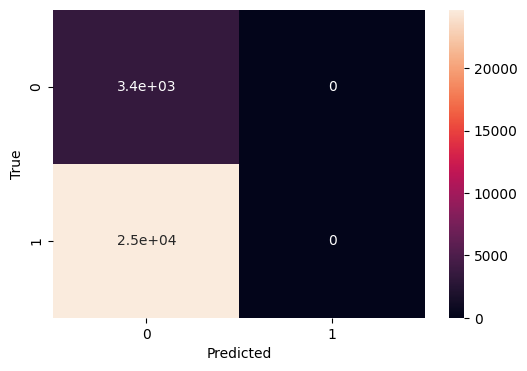

In [36]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [38]:
history = model.fit(X_train, y_train, batch_size=10, epochs=5)

Epoch 1/5
11224/11224 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9436 - loss: 0.1236
Epoch 2/5
11224/11224 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.9458 - loss: 0.1194
Epoch 3/5
11224/11224 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9460 - loss: 0.1171
Epoch 4/5
11224/11224 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9474 - loss: 0.1211
Epoch 5/5
11224/11224 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9478 - loss: 0.1101


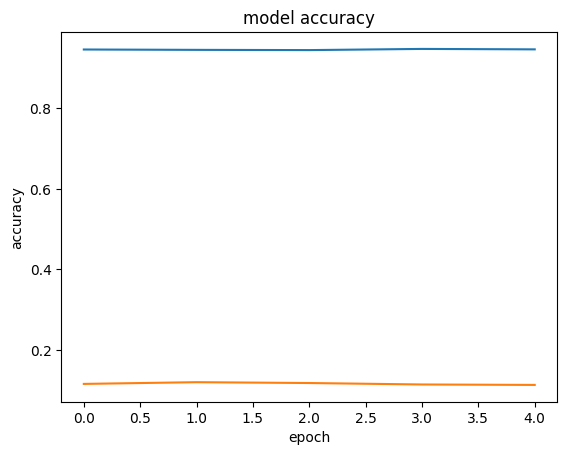

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
# Save the model
model.save('my_anns_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: